# Training Model Bi-LSTM Dataset Pidana 200

## Import Requirement

In [31]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import keras

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [32]:
warnings.filterwarnings('ignore')

In [33]:
print(tf.__version__)

2.13.0


## Set Parameter Training Model

In [34]:
BATCH_SIZE = 64  # Number of examples used in each iteration
EPOCHS = 100  # Number of passes through entire dataset
MAX_LEN = 10  # Max length of review (in words)
EMBEDDING = 100  # Dimension of word embedding vector

## Import Dataset Pidana 200

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

data = pd.read_csv("PN-PKL-230411100087.csv", encoding="latin1")
# data = pd.read_csv("/kaggle/input/dataset-pidana-baru/Dataset-Pidana200 (1).csv")

data['word'] = data['word'].str.lower()
data['word'] = data['word'].replace(to_replace ='\d+', value = '<\g<0>>', regex = True).replace(to_replace ='[0-9]', value = 'X', regex = True)
data = data.fillna(method="ffill")

In [76]:
data

,doc,sentence,word,prev,next,pos,tag
0,doc:0,sentence: 000001,putusan,.,nomor,NOUN,O
1,doc:0,sentence: 000001,nomor,putusan,14,NOUN,O
2,doc:0,sentence: 000001,<xx>,nomor,/,NUM,B_VERN
3,doc:0,sentence: 000001,pid,/,.,NOUN,I_VERN
4,doc:0,sentence: 000001,sus,.,/,PROPN,I_VERN
...,...,...,...,...,...,...,...
1741414,doc:284,sentence: 048499,panitera,h,pengganti,NOUN,O
1741415,doc:284,sentence: 048499,pengganti,panitera,",",NOUN,O
1741416,doc:284,sentence: 048499,ttd,",",agus,PROPN,O
1741417,doc:284,sentence: 048499,agus,ttd,giharno,NOUN,B_REGI


In [77]:
data.groupby('tag').count()

,doc,sentence,word,prev,next,pos
tag,,,,,,
B_ADVO,234,234,234,234,234,234
B_ARTV,969,969,969,969,969,969
B_CRIA,4301,4301,4301,4301,4301,4301
B_DEFN,2322,2322,2322,2322,2322,2322
B_JUDP,378,378,378,378,378,378
B_JUG,732,732,732,732,732,732
B_PENA,269,269,269,269,269,269
B_PROS,231,231,231,231,231,231
B_PUNI,316,316,316,316,316,316


In [78]:
data = data[data['pos'] != 'PUNCT']
data = data[data['pos'] != 'PRON']
data = data[data['pos'] != 'CCONJ']
data = data[data['pos'] != 'ADP']
data = data[data['pos'] != 'AUX']
data = data[data['pos'] != 'DET']
data = data[data['pos'] != 'ADV> Menimbang <VERB']
data = data[data['pos'] != ' <SYM']
data = data[data['pos'] != 'PROPN> LEL <PROPN']
data = data[data['pos'] != 'PROPN> _ <PROPN> Er <PROPN']
data = data[data['pos'] != 'PROPN> _ <PUNCT> IV <NUM']
data = data[data['pos'] != 'PROPN> _ <PROPN> Ep <PROPN']

In [79]:
# data[data['pos'] == 'PRON']

In [80]:
# data['pos'].unique()

In [81]:
# data['tag'] = data['tag'].apply(lambda x: [x])
# # Gabungkan tags dalam sentence yang sama dan hapus sentence yang hanya berisi tag 'O'
# df_combined = (
#     data.groupby(['doc', 'sentence'])['tag']
#     .agg(lambda x: sum(x, []))
#     .apply(lambda tags: tags if any(tag != 'O' for tag in tags) else [])
#     .reset_index(name='tag')
# )

# # Hapus baris yang tidak memiliki tag atau memiliki tag kosong
# df_combined = df_combined[df_combined['tag'].apply(lambda x: bool(x))]

# # Buat DataFrame baru hanya berisi baris yang sesuai dengan df_combined
# filtered_df = data[data['sentence'].isin(df_combined['sentence'])]

# # Pisahkan df_combined per tag dan isi sentence berdasarkan tag yang dipisah tadi
# result_rows = []
# for index, row in filtered_df.iterrows():
#     for tag in row['tag']:
#         result_rows.append({
#             'doc': row['doc'],
#             'sentence': row['sentence'],
#             'word': row['word'],
# #             'pos': row['pos'],
#             'prev': row['prev'],
#             'next': row['next'],
#             'tag': tag
#         })

# # Tampilkan dataframe setelah penggabungan, penghapusan, pemisahan kembali tags, dan pengisian kolom 'sentence'
# data = pd.DataFrame(result_rows)

# # Tampilkan dataframe hasil
# data

In [82]:
data.groupby('tag').count()

,doc,sentence,word,prev,next,pos
tag,,,,,,
B_ADVO,234,234,234,234,234,234
B_ARTV,969,969,969,969,969,969
B_CRIA,4301,4301,4301,4301,4301,4301
B_DEFN,2322,2322,2322,2322,2322,2322
B_JUDP,378,378,378,378,378,378
B_JUG,732,732,732,732,732,732
B_PENA,269,269,269,269,269,269
B_PROS,231,231,231,231,231,231
B_PUNI,316,316,316,316,316,316


## Menambahkan token untuk Padding data

In [83]:
words = list(set(data["word"].values))
words.append("ENDPAD")
n_words = len(words)
n_words

17261

In [84]:
tags = list(set(data["tag"].values))
n_tags = len(tags)
n_tags

25

## Mengambil Data berdasarkan Dokumen dan Sentence

In [85]:
class SentenceGetter(object):

    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, t) for w, t in zip(s["word"].values.tolist(),
                                                           s["tag"].values.tolist())]
        self.grouped = self.data.groupby("sentence").apply(agg_func)
        self.sentences = [s for s in self.grouped]

    def get_next(self):
        try:
            s = self.grouped[self.n_sent]
            self.n_sent += 1
            return s
        except:
            return None

class DocGetter(object):

    def __init__(self, data):
        self.n_doc = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, t) for w, t in zip(s["word"].values.tolist(),
                                                           s["tag"].values.tolist())]
        self.grouped = self.data.groupby("doc").apply(agg_func)
        self.docs = [s for s in self.grouped]

    def get_next(self):
        try:
            d = self.grouped[self.n_doc]
            self.n_doc += 1
            return d
        except:
            return None

In [86]:
# getter = DocGetter(data)
# docs = getter.docs
getter = SentenceGetter(data)
sentences = getter.sentences

### Visualisasi panjang kalimat pada dataset berdasarkan sentence

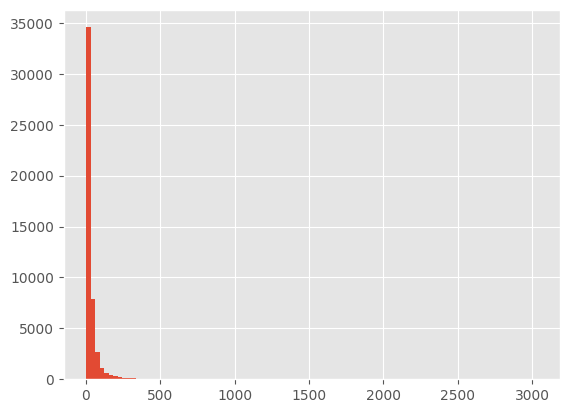

In [87]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")

plt.hist([len(s) for s in sentences], bins=100)
plt.show()

## Membentuk Dictionary

In [88]:
# Vocabulary Key:word -> Value:token_index
# The first 2 entries are reserved for PAD and UNK
# word2idx = {w: i + 2 for i, w in enumerate(vocab)}
word2idx = {k: v + 2 for (k, v) in zip(words, range(len(words)))}
word2idx["UNK"] = 1 # Unknown words
word2idx["PAD"] = 0 # Padding

# Vocabulary Key:token_index -> Value:word
idx2word = {i: w for w, i in word2idx.items()}

# Vocabulary Key:Label/Tag -> Value:tag_index
# The first entry is reserved for PAD
tag2idx = {t: i+1 for i, t in enumerate(tags)}
tag2idx["PAD"] = 0

# Vocabulary Key:tag_index -> Value:Label/Tag
idx2tag = {i: w for w, i in tag2idx.items()}

## Spliting Dataset Training dan Testing

In [89]:
from tensorflow.keras.utils import pad_sequences

# Convert each sentence from list of Token to list of word_index
X = [[word2idx[w[0]] for w in s] for s in sentences]
# Padding each sentence to have the same lenght
X = pad_sequences(maxlen=MAX_LEN, sequences=X, padding="post", value=word2idx["PAD"])


# Convert Tag/Label to tag_index
y = [[tag2idx[w[1]] for w in s] for s in sentences]
# Padding each sentence to have the same lenght
y = pad_sequences(maxlen=MAX_LEN, sequences=y, padding="post", value=tag2idx["PAD"])

from keras.utils import to_categorical
# One-Hot encode
y = [to_categorical(i, num_classes=n_tags+1) for i in y]

from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.1, shuffle=False)
X_tr.shape, X_te.shape, np.array(y_tr).shape, np.array(y_te).shape

((43647, 10), (4850, 10), (43647, 10, 26), (4850, 10, 26))

## Cek konversi dataset ke bentuk indeks

In [90]:
print("The word indonesia is identified by the index: {}".format(word2idx["indonesia"]))
print("The labels B_ADVO is identified by the index: {}".format(tag2idx["B_ADVO"]))
i=2
print('Raw Sample  : ', ' '.join([w for w, t in getter.sentences[i]]))
print('Text2vec    : ', ' '.join(['{}'.format(word2idx[w]) for w, t in getter.sentences[i]]))
print('Text2vec PAD: ', ' '.join(['{}'.format(w) for w in X[i]]))
print('Raw Label   : ', ' '.join([t for w, t in getter.sentences[i]]))
print('Tag2vec     : ', ' '.join(['{}'.format(tag2idx[t]) for w, t in getter.sentences[i]]))

The word indonesia is identified by the index: 314
The labels B_ADVO is identified by the index: 4
Raw Sample  :  membaca -penetapan ketua pengadilan negeri pekalongan nomor <xx> pid sus <xxxx> pn pkl tanggal <xx> januari <xxxx> penunjukan majelis hakim
Text2vec    :  14493 16531 14452 16179 16180 9062 15130 10591 10863 17155 11374 16660 14374 9832 10591 510 11374 4604 16987 442
Text2vec PAD:  11374 16660 14374 9832 10591 510 11374 4604 16987 442
Raw Label   :  O O O O O O O B_VERN I_VERN I_VERN I_VERN I_VERN I_VERN O O O O O O O
Tag2vec     :  25 25 25 25 25 25 25 6 12 12 12 12 12 25 25 25 25 25 25 25


In [91]:
! pip install tensorflow-addons

## Arsitektur Model

In [92]:
from keras import Model
from keras import optimizers
from keras.layers import Input, LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional, SpatialDropout1D
from tensorflow_addons.layers import CRF

input = Input(shape=(MAX_LEN,))

model = Embedding(input_dim=n_words+1, output_dim=EMBEDDING, input_length=MAX_LEN)(input)
model = Dropout(0.1)(model)
model = Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.1))(model)

out = TimeDistributed(Dense(n_tags+1, activation="softmax"))(model)  # softmax output layer

model = Model(input, out)

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 10)]              0         
                                                                 
 embedding_2 (Embedding)     (None, 10, 100)           1726200   
                                                                 
 dropout_2 (Dropout)         (None, 10, 100)           0         
                                                                 
 bidirectional_2 (Bidirecti  (None, 10, 200)           160800    
 onal)                                                           
                                                                 
 time_distributed_2 (TimeDi  (None, 10, 26)            5226      
 stributed)                                                      
                                                                 
Total params: 1892226 (7.22 MB)
Trainable params: 1892226 (

In [93]:
history = model.fit(np.array(X_tr).astype(int),
                    np.array(y_tr).astype(int),
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_split=0.1,
                    verbose=1)

Epoch 1/100
614/614 [==============================] - 19s 25ms/step - loss: 0.1778 - accuracy: 0.9719 - val_loss: 0.0821 - val_accuracy: 0.9817
Epoch 2/100
614/614 [==============================] - 20s 32ms/step - loss: 0.0549 - accuracy: 0.9861 - val_loss: 0.0596 - val_accuracy: 0.9849
Epoch 3/100
614/614 [==============================] - 17s 28ms/step - loss: 0.0391 - accuracy: 0.9896 - val_loss: 0.0475 - val_accuracy: 0.9868
Epoch 4/100
614/614 [==============================] - 19s 30ms/step - loss: 0.0314 - accuracy: 0.9914 - val_loss: 0.0428 - val_accuracy: 0.9870
Epoch 5/100
614/614 [==============================] - 23s 37ms/step - loss: 0.0264 - accuracy: 0.9926 - val_loss: 0.0419 - val_accuracy: 0.9874
Epoch 6/100
614/614 [==============================] - 22s 35ms/step - loss: 0.0235 - accuracy: 0.9931 - val_loss: 0.0402 - val_accuracy: 0.9877
Epoch 7/100
614/614 [==============================] - 21s 35ms/step - loss: 0.0217 - accuracy: 0.9935 - val_loss: 0.0351 - val_ac

### Save Model

In [94]:
import torch

In [97]:
path = 'model-BiLSTM-Pidana200-modif.pth'
torch.save(model, path)

### Visualisasi hasil training model

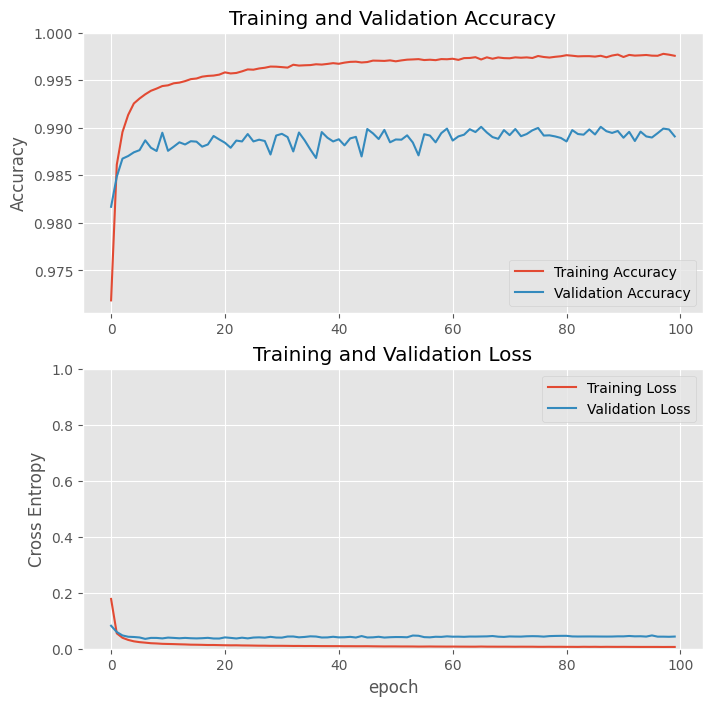

In [98]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## Evaluasi

In [99]:
print("Max index in X_te:", X_te.max())
print("n_words:", n_words)

Max index in X_te: 17254
n_words: 17261


In [100]:
eve = model.predict(X_te)

152/152 [==============================] - 1s 5ms/step


In [101]:
y_pred = np.argmax(eve, axis=-1)
y_test_true = np.argmax(y_te, -1)

# Convert the index to tag
y_pred = [[idx2tag[i] for i in row] for row in y_pred]
y_test_true = [[idx2tag[i] for i in row] for row in y_test_true]

In [102]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

m = MultiLabelBinarizer().fit(y_test_true)
print("Precision Score: {}".format(precision_score(m.transform(y_test_true), m.transform(y_pred), average="macro")))
print("Recall Score   : {}".format(recall_score(m.transform(y_test_true), m.transform(y_pred), average="macro")))
print("F1-score Score : {}".format(f1_score(m.transform(y_test_true), m.transform(y_pred), average="macro")))

Precision Score: 0.6917417247616539
Recall Score   : 0.7520111745710594
F1-score Score : 0.7116993283310178


In [103]:
from sklearn.metrics import classification_report
def c_report(y_pred, y_true):
  # Menggabungkan elemen-elemen array menjadi satu list
  y_pred_flat = [item for sublist in y_pred for item in sublist]
  y_true_flat = [item for sublist in y_true for item in sublist]
  report = classification_report(y_pred_flat, y_true_flat)
  return report

In [104]:
report = c_report(y_pred, y_test_true)
print(report)

              precision    recall  f1-score   support

      B_ADVO       1.00      0.79      0.88        14
      B_ARTV       0.68      0.68      0.68        31
      B_CRIA       0.69      0.66      0.67       178
      B_DEFN       0.35      0.37      0.36        19
      B_JUDP       0.00      0.00      0.00         2
       B_JUG       0.89      1.00      0.94        16
      B_PENA       1.00      0.67      0.80         3
      B_PROS       0.94      0.89      0.92        19
      B_PUNI       0.75      0.94      0.83        16
      B_REGI       1.00      0.85      0.92        26
      B_TIMV       0.00      0.00      0.00         0
      B_VERN       0.81      0.76      0.79        17
      I_ADVO       0.83      0.83      0.83        18
      I_ARTV       0.51      0.58      0.54       102
      I_CRIA       0.00      0.00      0.00         3
      I_DEFN       0.37      0.52      0.43       126
      I_JUDP       1.00      0.33      0.50         3
       I_JUG       0.93    

### Confusion matriks

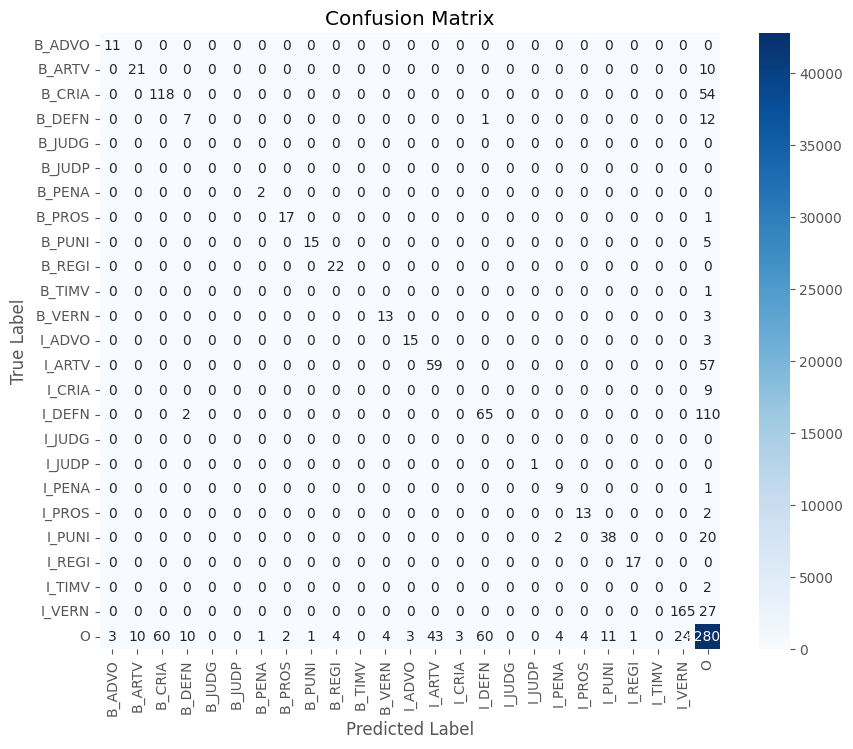

In [105]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Definisi class_names (sesuaikan dengan label yang sesuai dalam datasetmu)
class_names = ['B_ADVO', 'B_ARTV', 'B_CRIA', 'B_DEFN', 'B_JUDG', 'B_JUDP', 'B_PENA', 'B_PROS', 'B_PUNI', 'B_REGI', 'B_TIMV', 'B_VERN', 'I_ADVO', 'I_ARTV', 'I_CRIA', 'I_DEFN', 'I_JUDG', 'I_JUDP', 'I_PENA', 'I_PROS', 'I_PUNI', 'I_REGI', 'I_TIMV', 'I_VERN', 'O']

conf_mat = confusion_matrix([item for sublist in y_test_true for item in sublist],
                            [item for sublist in y_pred for item in sublist],
                            labels=class_names)

# Visualisasi confusion matrix menggunakan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt=".0f", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


## Ektraksi Entitas dari text

In [110]:
import tensorflow as tf
from tensorflow.keras.utils import pad_sequences
import numpy as np
import re

# --- FUNGSI PREPROCESSING & PREDIKSI (dari atas) ---
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', r'<\g<0>>', text)
    text = re.sub(r'[0-9]', 'X', text)
    return text

def prepare_input_sentence_indices(sentence, word2idx, max_len):
    cleaned_sentence = preprocess_text(sentence)
    words = cleaned_sentence.split()
    indices = [word2idx.get(word, word2idx["UNK"]) for word in words]
    padded_indices = pad_sequences(maxlen=max_len, sequences=[indices], padding="post", value=word2idx["PAD"])
    return padded_indices, len(words)

loaded_model = torch.load("model-BiLSTM-Pidana200-modif.pth", weights_only=False)

tag2idx = {t: i+1 for i, t in enumerate(tags)}
tag2idx["PAD"] = 0
idx2tag = {i: w for w, i in tag2idx.items()}
n_tags = len(tags)
n_words = len(word2idx)
MAX_LEN = 10 # Harus 10 sesuai training

# --- PROSES PREDIKSI ---
new_sentence = "Nomor 194/Pid.B 2024 PN Pkl"# Contoh

input_data_indices, original_length = prepare_input_sentence_indices(new_sentence, word2idx, MAX_LEN)
predictions_prob = loaded_model.predict(input_data_indices)
predicted_indices = np.argmax(predictions_prob, axis=-1)[0]
predicted_tags = [idx2tag.get(idx, 'PAD') for idx in predicted_indices]

effective_length = min(original_length, MAX_LEN)
final_tags = predicted_tags[:effective_length]

# --- TAMPILKAN HASIL ---
cleaned_sentence_for_display = preprocess_text(new_sentence)
words_for_display = cleaned_sentence_for_display.split()[:effective_length]

print("Kalimat Input:", new_sentence)
print("-" * 30)
print("Kata\t\tPrediksi Tag")
print("-" * 30)
for word, tag in zip(words_for_display, final_tags):
    print(f"{word:<15}\t{tag}")

1/1 [==============================] - 0s 464ms/step
Kalimat Input: Nomor 194/Pid.B 2024 PN Pkl
------------------------------
Kata		Prediksi Tag
------------------------------
nomor          	O
<XXX>/pid.b    	O
<XXXX>         	I_VERN
pn             	I_VERN
pkl            	I_VERN
